In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
from scipy.stats import chi2
from scipy import interpolate
import pandas as pd
import math


Welcome to JupyROOT 6.16/00


Comparison of methodologies

In [2]:
# # initialize arr to fill
# # set number of universes
# num_uni= int(3000/3)

# # indices=[i*25 for i in range(100)]
# indices=[0]

# # reformat indices to string format used to save files
# for i in range(len(indices)):
#     indices[i]=f'{indices[i]:05d}'

# # -2lnL dicts for test point, bf from grid, and bf from min
# RDict_pt = {}
# RDict_grid = {}
# RDict_min = {}

# # loop through text files and save to dict
# for k in indices:
#     print(k)
#     pT_list=[]
#     grid_list=[]
#     min_list=[]
#     with open("FCTests/chis_"+k+".txt","r") as chi:
#         lines = chi.readlines()
#         for i in range(num_uni):
#             lines[i*3].strip() #grid
#             lines[i*3+1].strip() # min
#             lines[i*3+2].strip() # pt

#             vals0 = lines[i*3].split(" ")
#             vals1 = lines[i*3+1].split(" ")
#             vals2 = lines[i*3+2].split(" ")
            
#             for j in range(len(vals0)):
#                 grid_list.append(float(vals0[j]))
#             for j in range(len(vals1)):
#                 min_list.append(float(vals1[j]))
#             for j in range(len(vals2)):
#                 pT_list.append(float(vals2[j]))

# #     save to dictionary        
#     RDict_pt[k] = pT_list
#     RDict_grid[k] = grid_list
#     RDict_min[k] = min_list
    
# print(RDict_pt)
# print(RDict_grid)
# print(RDict_min)

In [3]:
# # look at each index individually
# for i in RDict_grid:
#     grid_list=RDict_grid[i]
#     min_list=RDict_min[i]
#     pT_list=RDict_pt[i]
    
#     # make an R plot for each method
#     delta_grid=[]
#     delta_min=[]
#     difference=[]

#     for u in range(num_uni):
#         delta_grid.append(pT_list[u]-grid_list[u])
#         delta_min.append(pT_list[u]-min_list[u])
#         if(pT_list[u]-min_list[u] >50):
#             print(pT_list[u],min_list[u],grid_list[u])
#         difference.append(grid_list[u]-min_list[u])


#     delta_grid.sort()
#     val_90th_grid =delta_grid[math.floor(num_uni*.9)]
#     delta_min.sort()
#     val_90th_min =delta_min[math.floor(num_uni*.9)]


#     # turn into histograms
#     myrange=[0,50]
#     fig,ax = plt.subplots(figsize=(10,8))
#     plt.hist(delta_grid,bins=30,range=myrange,histtype='step',label="grid search only",color='blue')
#     plt.plot([val_90th_grid,val_90th_grid],[0,250],color='blue',label=r'$90\% R_c$: '+str("%.3f" %val_90th_grid))
#     plt.hist(delta_min,bins=30,range=myrange,histtype='step',label="minimizer only",color='red')
#     plt.plot([val_90th_min,val_90th_min],[0,250],color='red',label=r'$90\% R_c$: '+str("%.3f" %val_90th_min))
#     plt.plot([6.25,6.25],[0,250],color='black',label='Wilks 3 dof 90%')
#     plt.xlabel(r"R",fontsize=20)
#     plt.ylabel(r"# of pseudo-experiments",fontsize=20)
#     plt.title(str(i),fontsize=20)
#     plt.legend(fontsize=15)
#     plt.show()
#     plt.close()

In [4]:
# # look at each index individually
# for i in RDict_grid:
#     grid_list=RDict_grid[i]
#     min_list=RDict_min[i]
#     pT_list=RDict_pt[i]
    
#     # make an R plot for each method
#     difference=[]

#     for u in range(num_uni):
#         difference.append(min_list[u]-grid_list[u])



#     # turn into histograms
#     myrange=[-30,30]
#     fig,ax = plt.subplots(figsize=(10,8))
#     plt.hist(difference,bins=30,range = myrange,histtype='step',color='blue')
#     plt.plot([0,0],[0,250],color='black')

#     plt.xlabel(r"-2ln(L) minimizer only - grid only",fontsize=20)
#     plt.ylabel(r"# of pseudo-experiments",fontsize=20)
#     plt.title(str(i),fontsize=20)
# #     plt.legend(fontsize=15)
#     plt.show()
#     plt.close()

Get the R_crit values from FC method

In [6]:
# initialize arr to fill
# set number of universes
num_uni= int(2000/2)

# indices=[i for i in range(15625)]
indices=[0]

# reformat indices to string format used to save files
for i in range(len(indices)):
    indices[i]=f'{indices[i]:05d}'

# -2lnL dicts for test point, bf from grid, and bf from min
RDict_pt = {}
RDict_min = {}

# loop through text files and save to dict
for k in indices:
    print(k)
    pT_list=[]
    min_list=[]
    with open("FCTests/chis_"+k+".txt","r") as chi:
        lines = chi.readlines()
        for i in range(num_uni):
            lines[i*2].strip() #min
            lines[i*2+1].strip() # pt

            vals0 = lines[i*2].split(" ")
            vals1 = lines[i*2+1].split(" ")
            
            for j in range(len(vals0)):
                min_list.append(float(vals0[j]))
            for j in range(len(vals1)):
                pT_list.append(float(vals1[j]))

#     save to dictionary        
    RDict_pt[k] = pT_list
    RDict_min[k] = min_list
    
print(RDict_pt)
print(RDict_min)

00000
{'00000': [298.303, 174.5, 265.073, 200.686, 186.245, 205.496, 164.876, 165.069, 187.934, 179.798, 177.621, 163.482, 165.389, 173.256, 150.141, 256.978, 167.398, 167.786, 153.504, 253.574, 167.948, 186.157, 187.766, 162.042, 198.161, 179.062, 173.083, 326.481, 198.79, 169.961, 245.741, 192.403, 205.433, 199.862, 195.028, 275.13, 202.752, 223.597, 181.057, 159.374, 287.985, 218.333, 160.335, 189.837, 159.208, 256.158, 147.487, 262.734, 189.688, 213.301, 156.178, 169.965, 164.729, 168.04, 152.728, 146.962, 180.846, 271.687, 164.797, 204.05, 157.458, 160.927, 165.761, 164.384, 230.277, 181.933, 173.784, 155.14, 200.285, 204.609, 163.723, 227.513, 156.117, 156.099, 260.252, 166.954, 181.788, 154.538, 189.249, 197.064, 158.015, 155.657, 186.02, 242.451, 149.888, 252.902, 167.351, 164.983, 169.668, 196.427, 230.903, 200.573, 189.836, 185.655, 157.657, 157.745, 232.859, 191.339, 263.93, 266.505, 197.005, 194.405, 166.35, 152.579, 165.641, 190.474, 183.482, 178.434, 172.718, 184.342, 155

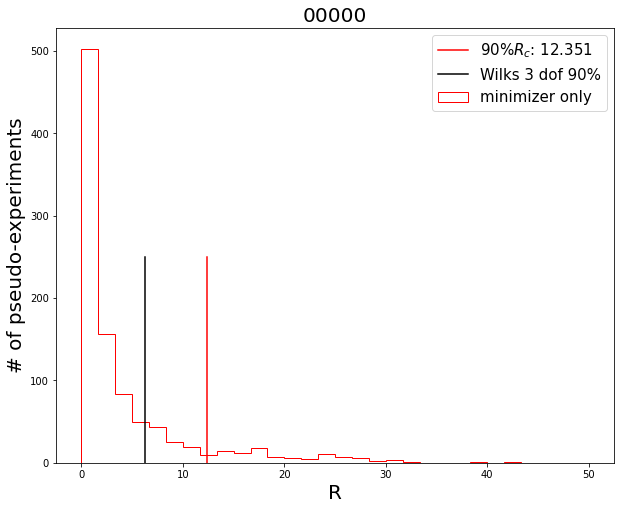

In [8]:
# look at each index individually
R_list=[]
num=0
for i in RDict_min:
    min_list=RDict_min[i]
    pT_list=RDict_pt[i]
    
    # make an R plot for each method
    delta_min=[]
    difference=[]

    for u in range(num_uni):
        delta_min.append(pT_list[u]-min_list[u])

    delta_min.sort()
    val_90th_min =delta_min[math.floor(num_uni*.9)]
    R_list.append(val_90th_min)
    
    # plot some examples
    if(num%100==0):
        # turn into histograms
        myrange=[0,50]
        fig,ax = plt.subplots(figsize=(10,8))
        plt.hist(delta_min,bins=30,range=myrange,histtype='step',label="minimizer only",color='red')
        plt.plot([val_90th_min,val_90th_min],[0,250],color='red',label=r'$90\% R_c$: '+str("%.3f" %val_90th_min))
        plt.plot([6.25,6.25],[0,250],color='black',label='Wilks 3 dof 90%')
        plt.xlabel(r"R",fontsize=20)
        plt.ylabel(r"# of pseudo-experiments",fontsize=20)
        plt.title(str(i),fontsize=20)
        plt.legend(fontsize=15)
        plt.show()
        plt.close()
    
    num +=1

In [ ]:
# load in the bins for the grid points
with open("bins_sens.txt","r") as bins:
    lines = bins.readlines()
    lines[0].strip()
    lines[1].strip()
    lines[2].strip()
    vals0 = lines[0].split(" ")
    vals1 = lines[1].split(" ")
    vals2 = lines[2].split(" ")
    m41_list= []
    ue4_list= []
    um4_list= []
    for v in range(len(vals0)-1):
        m41_list.append(float(vals0[v]))
    for v in range(len(vals1)-1):
        ue4_list.append(float(vals1[v]))
    for v in range(len(vals2)-1):
        um4_list.append(float(vals2[v]))
print("m values:", m41_list )
print("ue4 values:",ue4_list)
print("um4 values:",um4_list)

In [12]:
# print out some test points
print("R_crit at null =", R_list[0])
print("R_crit at gbf =", R_list[8542])
print("R_crit at max =", R_list[15624])
print("R_crit at 12992 =", R_list[12992])
print("R_crit at 9799 =", R_list[9799])
print("R_crit at 9071 =", R_list[9071])
print("R_crit at 10565 =", R_list[10565])
print("R_crit at 7370 =", R_list[7370])

NameError: name 'R_list' is not defined

In [13]:
# change into 3d array of grid values
Rcrit_arr=np.zeros((25,25,25))

for pt in range(len(R_list)):
    #this is a mess, but works. Didn't want to hardcode any numbers
    m_id = math.floor(pt/((25*25)))
    # need the subtraction term so that it resets everytime m41 increases
    ue4_id = math.floor((pt-m_id*25*25)/(25))
    um4_id = pt % (25)
#     print(pt,m_id,ue4_id,um4_id)
    Rcrit_arr[ue4_id][m_id][um4_id]=R_list[pt]

NameError: name 'R_list' is not defined

In [14]:
# switch to bin centers for plotting
def getbincenters( fulllist):
    newlist =[]
    for i in range(len(fulllist)-1):
        topval = fulllist[i+1]
        botval = fulllist[i]
        center = (topval+botval)/float(2.0)
        newlist.append(center)
    return newlist

m41_center = getbincenters(m41_list)
ue4_center = getbincenters(ue4_list)
um4_center = getbincenters(um4_list)

NameError: name 'm41_list' is not defined

In [15]:
# make all the 3d slices of the Rcrit values
# norm=colors.Normalize(vmin=1e-13, vmax=20)
y,x = np.meshgrid(m41_list, ue4_list)
for i in range(len(um4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, Rcrit_arr[:,:,i])
    cbar = plt.colorbar()
    cbar.set_label(r'$R_{crit}$',rotation=0,fontsize=20)
    plt.xlabel(r"$U_{e4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{\mu4}$ ="+str(um4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig("Rcrit_umu4_"+str(i)+".png")
    plt.show()
    plt.close()
    
# at ue4
y,x = np.meshgrid(m41_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, Rcrit_arr[i,:,:].transpose())
    cbar = plt.colorbar()
    cbar.set_label(r'$R_{crit}$',rotation=0,fontsize=20)
    plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{e4}$ ="+str(ue4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig("Rcrit_ue4_"+str(i)+".png")
    plt.show()
    plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, Rcrit_arr[:,i,:])
    cbar = plt.colorbar()
    cbar.set_label(r'$R_{crit}$',rotation=0,fontsize=20)
    plt.ylabel(r"$U_{e4}$",fontsize=30)
    plt.xlabel(r"$U_{\mu4}$",fontsize=30)
    plt.title(r"$\Delta m^2_{41}$ ="+str(m41_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig("Rcrit_m41_"+str(i)+".png")
    plt.show()
    plt.close()


NameError: name 'm41_list' is not defined

Get Sensitivity results

In [16]:
# load in sensitivity results (data==null)
# each row represents a grid point
chi2_arr=[]
with open("chis_sens.txt","r") as chis:
    lines = chis.readlines()
    for line in lines:
        chi2_arr.append(float(line)
                        
# change chi2 arr to 25x25x25 for 3d plot
chi_arr_sens=np.zeros((25,25,25))
minpt =1000000
for pt in range(len(chi2_arr)):
    if chi2_arr[pt]<minpt: 
        minpt = chi2_arr[pt]
print(minpt)

sumex=0
for i in range(len(chi2_arr)):
    chi2_arr[i]=chi2_arr[i]-minpt
    val = chi2_arr[i]
    if (val > R_list[i]):
        sumex+=1
        
print("excluded grid points(FC)",sumex,float(sumex)/float(len(chi2_arr)))

for pt in range(len(chi2_arr)):
    #this is a mess, but works. Didn't want to hardcode any numbers
    m_id = math.floor(pt/((25)*(25)))
    ue4_id = math.floor((pt-m_id*(25)*(25))/(25))
    um4_id = pt % (25)
    chi_arr_sens[ue4_id][m_id][um4_id]=chi2_arr[pt]

SyntaxError: invalid syntax (<ipython-input-16-b55f020de83d>, line 10)

In [17]:
confidence_arr=np.copy(chi_arr_sens)
for i in range(25):
    for j in range(25):
        for k in range(25):
            delta=chi_arr_sens[i][j][k]
#             print(i,j,k,delta)
            if delta < Rcrit_arr[i][j][k]:
                confidence_arr[i][j][k] = 0
            else:
                confidence_arr[i][j][k] = 1 
                

NameError: name 'chi_arr_sens' is not defined

In [18]:
# make projections at global best fit
def fmt(x):
    s = f"{x*100:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

# at umu4: 
y,x = np.meshgrid(m41_list, ue4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[:,:,17],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R_{sens}$',rotation=0,fontsize=20)
#contour plots
y,x = np.meshgrid(m41_center, ue4_center)
contours = plt.contour(x, y, confidence_arr[:,:,17],[.9], colors='white',fontsize=20,label="wilks 90% CL")
plt.scatter([.116],[1.32],marker="*",color ="red",label="Global best fit",s=200)
plt.xlabel(r"$U_{e4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"$U_{\mu4}$ ="+str(um4_list[17]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=18)
plt.savefig("FCsens_ue4_bf.png")
plt.show()
plt.close()

# at ue4
y,x = np.meshgrid(m41_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[16,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R_{sens}$',rotation=0,fontsize=20)
#contour plots
y,x= np.meshgrid(m41_center, um4_center)
contours = plt.contour(x, y, confidence_arr[16,:,:].transpose(),[.9], colors='white',fontsize=20)
plt.scatter([.135],[1.32],marker="*",color ="red",label="Global best fit",s=200)
plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"$U_{e4}$ ="+str(ue4_list[16]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=18)
plt.savefig("FCsens_ue4_bf.png")
plt.show()
plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[:,13,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R_{sens}$',rotation=0,fontsize=20)
#contour plots
x,y = np.meshgrid(ue4_center, um4_center)
contours = plt.contour(x, y, confidence_arr[:,13,:],[.9], colors='white',fontsize=20);
plt.scatter([.116],[.135],marker="*",color ="red",label="Global best fit",s=200)
plt.ylabel(r"$U_{e4}$",fontsize=30)
plt.xlabel(r"$U_{\mu4}$",fontsize=30)
plt.title(r"$\Delta m^2_{41}$ ="+str(m41_list[13]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=18)
plt.savefig("FCsens_ue4_bf.png")
plt.show()
plt.close()

NameError: name 'm41_list' is not defined

In [19]:
y,x = np.meshgrid(m41_list, ue4_list)
for i in range(len(um4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_sens[:,:,i],norm=colors.Normalize(vmin=1e-13, vmax=20))
    cbar = plt.colorbar()
    cbar.set_label(r'$R$',rotation=0,fontsize=20)
    #contour plots
    y,x = np.meshgrid(m41_center, ue4_center)
    contours = plt.contour(x, y, confidence_arr[:,:,i],[.9], colors='white',fontsize=20,label="wilks 90% CL")
    plt.xlabel(r"$U_{e4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{\mu4}$ ="+str(um4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig("FCsens_um4_"+str(i)+".png")
    plt.show()
    plt.close()
    
# at ue4
y,x = np.meshgrid(m41_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_sens[i,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
    cbar = plt.colorbar()
    cbar.set_label(r'$R$',rotation=0,fontsize=20)
    #contour plots
    y,x= np.meshgrid(m41_center, um4_center)
    contours = plt.contour(x, y, confidence_arr[i,:,:].transpose(),[.9], colors='white',fontsize=20)
    plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{e4}$ ="+str(ue4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig("FCsens_ue4_"+str(i)+".png")
    plt.show()
    plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_sens[:,i,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
    cbar = plt.colorbar()
    cbar.set_label(r'$R$',rotation=0,fontsize=20)
    #contour plots
    x,y = np.meshgrid(ue4_center, um4_center)
    contours = plt.contour(x, y, confidence_arr[:,i,:],[.9], colors='white',fontsize=20);
    plt.ylabel(r"$U_{e4}$",fontsize=30)
    plt.xlabel(r"$U_{\mu4}$",fontsize=30)
    plt.title(r"$\Delta m^2_{41}$ ="+str(m41_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig("FCsens_"+str(i)+".png")
    plt.show()
    plt.close()

NameError: name 'm41_list' is not defined

Finally get FC data contour

In [20]:
# initialize arr to fill
chi2_data=[]
chi2_min_data = []
with open("chis_data.txt","r") as chis:
    lines = chis.readlines()
    for line in range(len(lines)):
        if line==len(lines)-1:
            chi2_min = lines[line].split(" ")
        else:
            chi2_data.append(float(lines[line]))

for i in range(len(chi2_min)):
    chi2_min_data[i]=float(chi2_min[i])

print("data best fit:",chi2_min)
print("R at null =", chi2_data[0])
print("R at gbf =", chi2_data[8542]-chi2_min_data[0])
print("R at max =", chi2_data[15624]-chi2_min_data[0])
print("R at 12992 =", chi2_data[12992]-chi2_min_data[0])
print("R at 9799 =", chi2_data[9799]-chi2_min_data[0])
print("R at 9071 =", chi2_data[9071]-chi2_min_data[0])
print("R at 10565 =", chi2_data[10565]-chi2_min_data[0])
print("R at 7370 =", chi2_data[7370]-chi2_min_data[0])

NameError: name 'm41_list' is not defined

In [25]:
# change chi2 arr to 25x25x25 for 3d plot
chi_arr_data=np.zeros((25,25,25))
minpt1 =1000000
for pt in range(len(chi2_data)):
    if chi2_data[pt]<minpt1: 
        minpt1 = chi2_data[pt]
print("grid search min:",minpt1,"minimizer min:",chi2_min_data[0])

sumex1=0
for i in range(len(chi2_data)):
    chi2_data[i]=chi2_data[i]-chi2_min_data[0]
    val = chi2_data[i]
    if (val > R_list[i]):
        sumex1+=1
        
print("size of excluded region:",sumex1,float(sumex1)/float(len(chi2_data)))

for pt in range(len(chi2_data)):
    #this is a mess, but works. Didn't want to hardcode any numbers
    m_id = math.floor(pt/((25*25)))
    # need the subtraction term so that it resets everytime m41 increases
    ue4_id = math.floor((pt-m_id*25*25)/(25))
    um4_id = pt % (25)
#     print(pt,m_id,ue4_id,um4_id)
    chi_arr_data[ue4_id][m_id][um4_id]=data[pt]

NameError: name 'chi2_data' is not defined

In [26]:
confidence_arr_data=np.copy(chi_arr_data)
for i in range(25):
    for j in range(25):
        for k in range(25):
            delta=chi_arr_data[i][j][k]
            if delta < Rcrit_arr[i][j][k]:
                confidence_arr_data[i][j][k] = 0
            else:
                confidence_arr_data[i][j][k] = 1 

In [23]:
# make projections at data best fit
y,x = np.meshgrid(m41_list, ue4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_data[:,:,0],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R_{data}$',rotation=0,fontsize=30)
#contour plots
y,x = np.meshgrid(m41_center, ue4_center)
contours = plt.contour(x, y, confidence_arr_data[:,:,0],[.9], colors='white')
plt.scatter(chi2_min[2],chi2_min[1]**2,marker="*",color ="red",label="data best fit",s=200)
plt.xlabel(r"$U_{e4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"$U_{\mu4}$ ="+str(um4_list[0]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
plt.savefig("FCdata_umu4_bf_data.png")
plt.show()
plt.close()

# at ue4
y,x = np.meshgrid(m41_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_data[24,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R_{data}$',rotation=0,fontsize=30)
#contour plots
y,x= np.meshgrid(m41_center, um4_center)
contours = plt.contour(x, y, confidence_arr_data[24,:,:].transpose(),[.9], colors='white',fontsize=20)
plt.scatter(chi2_min[3],chi2_min[1]**2,marker="*",color ="red",label="data best fit",s=200)
plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"$U_{e4}$ ="+str(ue4_list[24]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
plt.savefig("FCdata_ue4_bf_data.png")
plt.show()
plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_data[:,16,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R_{data}$',rotation=0,fontsize=30)
#contour plots
x,y = np.meshgrid(ue4_center, um4_center)
contours = plt.contour(x, y, confidence_arr_data[:,16,:],[.9], colors='white',fontsize=20);
plt.scatter(chi2_min[3],chi2_min[2],marker="*",color ="red",label="data best fit",s=200)
plt.ylabel(r"$U_{e4}$",fontsize=30)
plt.xlabel(r"$U_{\mu4}$",fontsize=30)
plt.title(r"$\Delta m^2_{41}$ ="+str(m41_list[16]),fontsize=30)
plt.yscale("log")
plt.xscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
plt.savefig("FCdata_m41_bf_data.png")
plt.show()
plt.close()


NameError: name 'ue4_list' is not defined

In [24]:
# repeat for global best fit
y,x = np.meshgrid(m41_list, ue4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_data[:,:,17],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R_{data}$',rotation=0,fontsize=20)
#contour plots
y,x = np.meshgrid(m41_center, ue4_center)
contours = plt.contour(x, y, confidence_arr_data[:,:,17],[.9], colors='white',fontsize=20)
plt.scatter([.116],[1.32],marker="*",color ="red",label="Global best fit",s=200)
plt.xlabel(r"$U_{e4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"$U_{\mu4}$ ="+str(um4_list[17]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.savefig("FCdata_umu4_gbf_data.png")
plt.show()
plt.close()

# at ue4
y,x = np.meshgrid(m41_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_data[16,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=20)
#contour plots
y,x= np.meshgrid(m41_center, um4_center)
contours = plt.contour(x, y, confidence_arr_data[16,:,:].transpose(),[.9], colors='white',fontsize=20)
plt.scatter([.135],[1.32],marker="*",color ="red",label="Global best fit",s=200)
plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.title(r"$U_{e4}$ ="+str(ue4_list[16]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.savefig("FCdata_ue4_gbf_data.png")
plt.show()
plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_data[:,13,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R_{data}$',rotation=0,fontsize=20)
#contour plots
x,y = np.meshgrid(ue4_center, um4_center)
contours = plt.contour(x, y, confidence_arr_data[:,13,:],[.9], colors='white',fontsize=20);
plt.scatter([.116],[.135],marker="*",color ="red",label="Global best fit",s=200)
plt.ylabel(r"$U_{e4}$",fontsize=30)
plt.xlabel(r"$U_{\mu4}$",fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.title(r"$\Delta m^2_{41}$ ="+str(m41_list[13]),fontsize=30)
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.savefig("FCdata_m41_gbf_data.png")
plt.show()
plt.close()


NameError: name 'ue4_list' is not defined

In [ ]:
# now get all slices
y,x = np.meshgrid(m41_list, ue4_list)
for i in range(len(um4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_data[:,:,i],norm=colors.Normalize(vmin=1e-13, vmax=20))
    cbar = plt.colorbar()
    cbar.set_label(r'$R_{data}$',rotation=0,fontsize=20)
    #contour plots
    y,x = np.meshgrid(m41_center, ue4_center)
    contours = plt.contour(x, y, confidence_arr_data[:,:,i],[.9], colors='white',fontsize=20)
    plt.xlabel(r"$U_{e4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{\mu4}$ ="+str(um4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig("FCdata_umu4_"+str(i)+".png")
    plt.show()
    plt.close()
    
# at ue4
y,x = np.meshgrid(m41_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_data[i,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
    cbar = plt.colorbar()
    cbar.set_label(r'$R_{data}$',rotation=0,fontsize=20)
    #contour plots
    y,x= np.meshgrid(m41_center, um4_center)
    contours = plt.contour(x, y, confidence_arr_data[i,:,:].transpose(),[.9], colors='white',fontsize=20)
    plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{e4}$ ="+str(ue4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig("FCdata_ue4_"+str(i)+".png")
    plt.show()
    plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_data[:,i,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
    cbar = plt.colorbar()
    cbar.set_label(r'$R_{data}$',rotation=0,fontsize=20)
    #contour plots
    x,y = np.meshgrid(ue4_center, um4_center)
    contours = plt.contour(x, y, confidence_arr_data[:,i,:],[.9], colors='white',fontsize=20);
    plt.ylabel(r"$U_{e4}$",fontsize=30)
    plt.xlabel(r"$U_{\mu4}$",fontsize=30)
    plt.title(r"$\Delta m^2_{41}$ ="+str(m41_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig("FCdata_m41_"+str(i)+".png")
    plt.show()
    plt.close()
